In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn

In [ ]:
# Day -2 pricing data
prices_day_minus_2 = pd.read_csv("C:\\Users\\asrir\\OneDrive\\Documents\\GitHub\\prosperity3\\round-2-island-data-bottle\\round-2-island-data-bottle\\prices_round_2_day_-1.csv", sep=';')
print(f"Loaded prices for day -2: {len(prices_day_minus_2)} rows")

prices_day_minus_1 = pd.read_csv("C:\\Users\\asrir\\OneDrive\\Documents\\GitHub\\prosperity3\\round-2-island-data-bottle\\round-2-island-data-bottle\\prices_round_2_day_0.csv", sep=';')
print(f"Loaded prices for day -1: {len(prices_day_minus_1)} rows")

# Day 0 pricing data
prices_day_0 = pd.read_csv("C:\\Users\\asrir\\OneDrive\\Documents\\GitHub\\prosperity3\\round-2-island-data-bottle\\round-2-island-data-bottle\\prices_round_2_day_1.csv", sep=';')
print(f"Loaded prices for day 0: {len(prices_day_0)} rows")

prices_day_minus_2['day_from_file'] = -1
prices_day_minus_1['day_from_file'] = 0
prices_day_0['day_from_file'] = 1

all_prices_df = pd.concat([prices_day_minus_2, prices_day_minus_1, prices_day_0], ignore_index=True)

# Print information about the combined DataFrame
print(f"Combined trades DataFrame has {len(all_prices_df)} rows")
print(f"Columns: {all_prices_df.columns.tolist()}")

Loaded prices for day -2: 80000 rows
Loaded prices for day -1: 80000 rows
Loaded prices for day 0: 80000 rows
Combined trades DataFrame has 240000 rows
Columns: ['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss', 'day_from_file']


In [4]:
all_prices_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,day_from_file
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0,-1
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0,-1
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0,-1
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0,-1
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,1,999900,JAMS,6519,204,NaN,NaN,NaN,NaN,6521,204,NaN,NaN,NaN,NaN,6520.0,0.0,1
239996,1,999900,RAINFOREST_RESIN,9992,34,NaN,NaN,NaN,NaN,10008,34,NaN,NaN,NaN,NaN,10000.0,0.0,1
239997,1,999900,SQUID_INK,1880,20,NaN,NaN,NaN,NaN,1884,20,NaN,NaN,NaN,NaN,1882.0,0.0,1
239998,1,999900,PICNIC_BASKET1,58713,15,58712.0,21.0,NaN,NaN,58724,15,58725.0,21.0,NaN,NaN,58718.5,0.0,1


In [5]:
#cleaning prices
def fill_bid_ask_two_phase(df):
    """
    Fill NaN values in bid/ask columns using a two-phase approach:
    1. Ensure bid_price_1, bid_volume_1, ask_price_1, and ask_volume_1 are filled
    2. Fill bid_price_2, bid_volume_2, bid_price_3, bid_volume_3 with bid_price_1, bid_volume_1 if they are NaN
    3. Fill ask_price_2, ask_volume_2, ask_price_3, ask_volume_3 with ask_price_1, ask_volume_1 if they are NaN
    """
    df = df.copy()
    
    df['bid_price_2'] = df['bid_price_2'].fillna(df['bid_price_1'])
    df['bid_volume_2'] = df['bid_volume_2'].fillna(df['bid_volume_1'])
    
    df['bid_price_3'] = df['bid_price_3'].fillna(df['bid_price_1'])
    df['bid_volume_3'] = df['bid_volume_3'].fillna(df['bid_volume_1'])
    
    # For ask columns
    df['ask_price_2'] = df['ask_price_2'].fillna(df['ask_price_1'])
    df['ask_volume_2'] = df['ask_volume_2'].fillna(df['ask_volume_1'])
    
    df['ask_price_3'] = df['ask_price_3'].fillna(df['ask_price_1'])
    df['ask_volume_3'] = df['ask_volume_3'].fillna(df['ask_volume_1'])
    
    return df

In [6]:
filled_prices_df = fill_bid_ask_two_phase(all_prices_df)

In [9]:
filled_prices_df['product'].unique()

array(['CROISSANTS', 'JAMS', 'SQUID_INK', 'PICNIC_BASKET1',
       'PICNIC_BASKET2', 'RAINFOREST_RESIN', 'DJEMBES', 'KELP'],
      dtype=object)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def get_product_prices(df):
    # Group by timestamp and product, get the latest price for each
    prices = df.groupby(['timestamp', 'product'])['mid_price'].last().unstack()
    return prices

# Get the price data
product_prices = get_product_prices(filled_prices_df)

def calculate_spreads(prices_df):
    # If SQUID_INK represents both jams and djembes in your data
    # You might need to split this differently
    
    # Assuming conversion:
    # KELP = Croissants
    # SQUID_INK = Jams
    # Let's assume a derived Djembe price for illustration
    
    # Calculate synthetic basket price
    prices_df['SYNTHETIC_BASKET'] = (
        6 * prices_df['CROISSANTS'] +
        3 * prices_df['JAMS'] +  
        1 * prices_df['DJEMBES']
    )
    
    # Calculate spread (actual basket price - synthetic price)
    prices_df['SPREAD'] = prices_df['PICNIC_BASKET1'] - prices_df['SYNTHETIC_BASKET']
    
    # Calculate percentage spread
    prices_df['SPREAD_PCT'] = prices_df['SPREAD'] / prices_df['SYNTHETIC_BASKET'] * 100
    
    return prices_df


Spread Statistics (Day -1):
Mean Spread: 70.0449
Median Spread: 80.5000
Min Spread: -178.0000
Max Spread: 251.0000
Std Dev: 78.6671

Z-Score Statistics (Day -1):
Min Z-Score: -72.2002
Max Z-Score: 50.5574
Z-Score > 2: 4806 points
Z-Score < -2: 3538 points

Spread Statistics (Day 0):
Mean Spread: 43.9226
Median Spread: 44.0000
Min Spread: -131.0000
Max Spread: 222.0000
Std Dev: 82.7626

Z-Score Statistics (Day 0):
Min Z-Score: -47.7485
Max Z-Score: 70.3074
Z-Score > 2: 4212 points
Z-Score < -2: 4228 points

Spread Statistics (Day 1):
Mean Spread: 32.3198
Median Spread: 23.0000
Min Spread: -194.5000
Max Spread: 230.0000
Std Dev: 89.1765

Z-Score Statistics (Day 1):
Min Z-Score: -53.6725
Max Z-Score: 50.7263
Z-Score > 2: 3986 points
Z-Score < -2: 4704 points


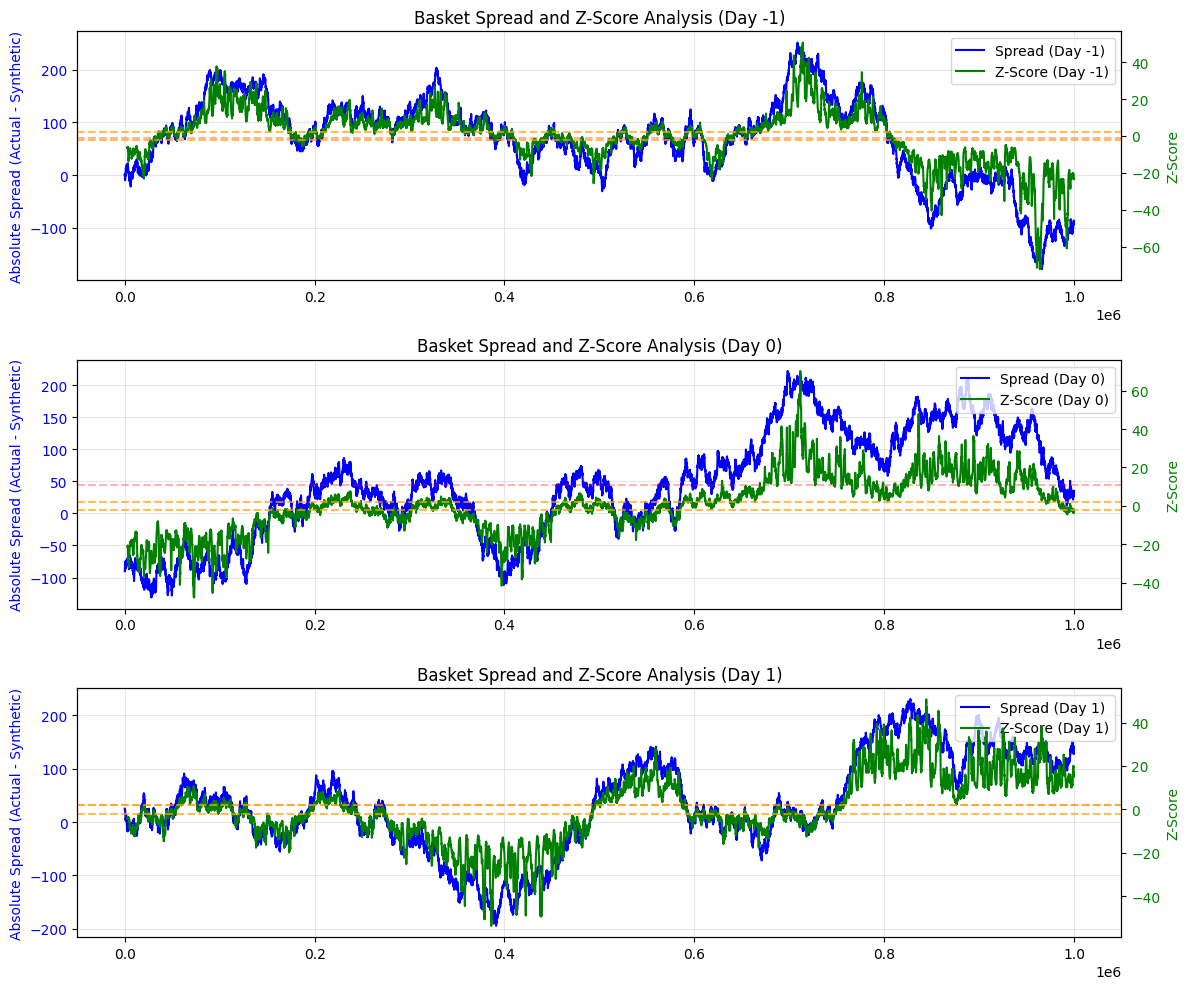

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots, one for each day
plt.figure(figsize=(12, 10))

# Loop through the three days
for i, day_value in enumerate([-1, 0, 1]):
    # Filter for rows with specified day value
    day_df = filled_prices_df[filled_prices_df['day'] == day_value]
    
    # Get the price data for the current day
    product_prices = get_product_prices(day_df)
    
    # Calculate spreads
    spreads_df = calculate_spreads(product_prices)
    
    # Calculate global mean for the day
    day_mean = spreads_df['SPREAD'].mean()
    
    # Calculate rolling std with a small window (adjust window size as needed)
    window_size = 30  # Adjust this parameter as needed
    spreads_df['ROLLING_STD'] = spreads_df['SPREAD'].rolling(window=window_size).std()
    
    # Calculate modified z-score (using fixed mean and rolling std)
    spreads_df['Z_SCORE'] = (spreads_df['SPREAD'] - day_mean) / spreads_df['ROLLING_STD']
    
    # Create subplot for this day
    plt.subplot(3, 1, i+1)
    
    # Plot both spread and z-score on the same subplot with dual y-axis
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    # Plot spread on left y-axis
    spread_line = ax1.plot(spreads_df.index, spreads_df['SPREAD'], 
                          label=f'Spread (Day {day_value})', color='blue')
    ax1.axhline(y=day_mean, color='r', linestyle='--', alpha=0.3, 
                label=f'Mean Spread: {day_mean:.2f}')
    ax1.set_ylabel('Absolute Spread (Actual - Synthetic)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Plot z-score on right y-axis
    z_line = ax2.plot(spreads_df.index, spreads_df['Z_SCORE'], 
                     label=f'Z-Score (Day {day_value})', color='green')
    ax2.axhline(y=2, color='orange', linestyle='--', alpha=0.7, label='Z = +2')
    ax2.axhline(y=-2, color='orange', linestyle='--', alpha=0.7, label='Z = -2')
    ax2.set_ylabel('Z-Score', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    
    # Title and grid
    plt.title(f'Basket Spread and Z-Score Analysis (Day {day_value})')
    ax1.grid(True, alpha=0.3)
    
    # Create combined legend
    lines = spread_line + z_line
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper right')
    
    # Calculate and print statistics
    day_spread_stats = {
        'Mean Spread': day_mean,
        'Median Spread': spreads_df['SPREAD'].median(),
        'Min Spread': spreads_df['SPREAD'].min(),
        'Max Spread': spreads_df['SPREAD'].max(),
        'Std Dev': spreads_df['SPREAD'].std()
    }
    
    print(f"\nSpread Statistics (Day {day_value}):")
    for stat, value in day_spread_stats.items():
        print(f"{stat}: {value:.4f}")
    
    # Calculate z-score statistics
    print(f"\nZ-Score Statistics (Day {day_value}):")
    print(f"Min Z-Score: {spreads_df['Z_SCORE'].min():.4f}")
    print(f"Max Z-Score: {spreads_df['Z_SCORE'].max():.4f}")
    print(f"Z-Score > 2: {(spreads_df['Z_SCORE'] > 2).sum()} points")
    print(f"Z-Score < -2: {(spreads_df['Z_SCORE'] < -2).sum()} points")

plt.tight_layout()
plt.show()

In [12]:
# Calculate spread and add it as a column to the filled_prices_df
def add_spread_column(df):
   # Get product prices grouped by timestamp
   prices = df.groupby(['timestamp', 'product'])['mid_price'].last().unstack()
   
   # Ensure all required columns exist
   if not all(col in prices.columns for col in ['PICNIC_BASKET1', 'CROISSANTS', 'JAMS', 'DJEMBES']):
       print("Missing one or more required product columns")
       return df
   
   # Calculate synthetic basket price
   synthetic_prices = 6 * prices['CROISSANTS'] + 3 * prices['JAMS'] + 1 * prices['DJEMBES']
   
   # Calculate spread (actual - synthetic)
   spread = prices['PICNIC_BASKET1'] - synthetic_prices
   
   # Convert spread to a DataFrame with timestamp as index
   spread_df = pd.DataFrame({'SPREAD': spread})
   
   # Merge spread back to original dataframe
   # First reset index on spread_df to make timestamp a column
   spread_df = spread_df.reset_index()
   
   # Make a copy of the original dataframe
   result_df = df.copy()
   
   # Create a mapping of timestamp to spread
   spread_map = dict(zip(spread_df['timestamp'], spread_df['SPREAD']))
   
   # Add spread column to the result dataframe
   result_df['SPREAD'] = result_df['timestamp'].map(spread_map)
   
   return result_df

# Apply the function to add the spread column
filled_prices_df_with_spread = add_spread_column(filled_prices_df)

# Display the first few rows to verify
filled_prices_df_with_spread['SPREAD'].unique()

array([  25. ,   22.5,   21.5,   23. ,   20. ,   12.5,    6.5,    4.5,
          6. ,    5. ,    2. ,    1.5,    4. ,   11.5,   13. ,    8.5,
          2.5,    7. ,   -2.5,   -6. ,   -7. ,  -11.5,  -12. ,  -15. ,
        -14.5,  -17. ,  -12.5,  -17.5,  -15.5,  -13. ,   -6.5,   -8. ,
         -3. ,   -0.5,   -9. ,    1. ,   -4. ,  -11. ,  -13.5,  -10.5,
        -10. ,   -5.5,   -7.5,   -4.5,   -5. ,   -1.5,   -2. ,    3. ,
         -1. ,   -3.5,    0. ,   -8.5,  -16. ,  -14. ,  -20.5,  -21.5,
        -19. ,  -19.5,  -22. ,  -26. ,  -23.5,  -24. ,   10. ,    9. ,
          8. ,    7.5,   17.5,   19. ,   14. ,   31. ,   29.5,   24. ,
         32. ,   29. ,   23.5,   25.5,   34. ,   35. ,   33.5,   28. ,
         33. ,   39.5,   48. ,   46.5,   48.5,   54. ,   51. ,   52. ,
         45.5,   46. ,   40. ,   42. ,   35.5,   22. ,   18.5,   14.5,
         19.5,   13.5,   21. ,   24.5,   20.5,   15.5,   16. ,   15. ,
         17. ,   16.5,   12. ,    9.5,   10.5,   26.5,   18. ,    5.5,
      

In [44]:
filled_prices_df_with_spread.to_csv("spread_cleaned.csv", index=False)